In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

In [2]:
data = pd.read_csv("./data/Plants_Dataset.csv")

In [3]:
data.head()
data.describe()

,height,mouth_diam,tube_diam,keel_diam,wingspread,hoodarea,wingarea,tubearea,tubemass_g,wingmass_g,Ca_ppm,P_ppm,K_ppm,Mg_ppm,C_pct,H_pct,N_pct
count,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,605.687500,30.347500,19.78875,6.385000,87.437500,45.047000,21.390000,84.305375,2.801250,0.144813,571.835625,1101.374250,11186.430500,1659.193375,48.921375,5.779250,1.048500
std,94.766414,5.938887,3.03907,2.121684,31.180099,12.822613,10.179287,22.163817,1.041462,0.088930,171.977674,297.301156,2726.031409,277.869269,3.480575,0.277716,0.205999
min,322.000000,13.600000,14.30000,1.600000,22.000000,13.810000,2.030000,29.570000,0.680000,0.020000,244.550000,662.550000,3599.580000,1068.960000,19.010000,5.170000,0.780000
25%,538.500000,26.225000,17.57500,5.075000,70.000000,34.725000,14.177500,66.637500,1.917500,0.070000,445.880000,873.557500,9409.420000,1484.490000,48.687500,5.617500,0.927500
50%,622.000000,31.300000,19.75000,6.100000,85.000000,44.740000,19.615000,88.660000,2.905000,0.130000,524.895000,1078.145000,11150.630000,1608.710000,49.190000,5.790000,0.985000
75%,665.000000,34.400000,20.80000,7.150000,108.000000,55.120000,26.570000,101.437500,3.480000,0.210000,675.710000,1247.345000,13347.385000,1779.355000,49.752500,5.942500,1.112500
max,845.000000,42.100000,29.60000,14.800000,199.000000,77.070000,58.180000,130.040000,5.890000,0.370000,1035.740000,2192.200000,17811.850000,2618.650000,52.110000,6.850000,1.750000


In [4]:
check_NaN(data)

Total NaN: 0
NaN by column:
 Site          0
height        0
mouth_diam    0
tube_diam     0
keel_diam     0
wingspread    0
hoodarea      0
wingarea      0
tubearea      0
tubemass_g    0
wingmass_g    0
Ca_ppm        0
P_ppm         0
K_ppm         0
Mg_ppm        0
C_pct         0
H_pct         0
N_pct         0
dtype: int64


In [5]:
data.target = data.Site
columns = data.columns
best_accuracy = 0
best_f1 = 0
best_f2 = 0

print("RUN")
#Loop through all features
for f1 in range(1,len(columns)):
    for f2 in range(1,len(columns)):
        if f1 == f2:
            continue
        #print("f1: ", f1, ". f2: " , f2)
        #Set the columns from our data to use
        data.features = data[[columns[f1],columns[f2]]]
        #Process the data to the right format for the KNN classifier
        data.features = preprocessing.MinMaxScaler().fit_transform(data.features)
        #Train
        x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2,random_state=42)
        #Find optimal K value?
        k_scores = []
        #The K should maybe go to 73?
        for k in range(1,5):
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn,data.features,data.target,cv=10,scoring='accuracy')
            k_scores.append(scores.mean())
            
        optimal_k = np.argmax(k_scores)  
        print("Optimal k with cross-validation: ", np.argmax(k_scores))
        if optimal_k == 0:
            continue

        #Run the classifier with optimal K
        classifier = KNeighborsClassifier(optimal_k)
        classifier.fit(x_train, y_train)
        predictions = classifier.predict(x_test)

        #Display the accuracy found
        #accuracy = str(accuracy_score(y_test, predictions)*100)+"%"
        accuracy = accuracy_score(y_test, predictions)*100
        #print("Accuracy:", accuracy)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_f1 = f1
            best_f2 = f2

print("Best accuracy: ", best_accuracy, ". Feature A: ", best_f1, ". Feature 2: ", best_f2, ".")

RUN
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0


C:\Users\reeve\AppData\Local\Temp\ipykernel_10732\310207539.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.target = data.Site
C:\Users\reeve\AppData\Local\Temp\ipykernel_10732\310207539.py:15: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.features = data[[columns[f1],columns[f2]]]


Optimal k with cross-validation:  0
Optimal k with cross-validation:  3
Optimal k with cross-validation:  3
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  2
Optimal k with cross-validation:  3
Optimal k with cross-validation:  3
Optimal k with cross-validation:  1
Optimal k with cross-validation:  3
Optimal k with cross-validation:  1
Optimal k with cross-validation:  0
Optimal k with cross-validation:  3
Optimal k with cross-validation:  1
Optimal k with cross-validation:  3
Optimal k with cross-validation:  0
Optimal k with cross-validation:  1
Optimal k with cross-validation:  2
Optimal k with cross-validation:  2
Optimal k with cross-validation:  3
Optimal k with cross-validation:  2
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validation:  1
Optimal k with cross-validat

Accuracy: 81.25


Text(0.5, 1.0, 'Testing')

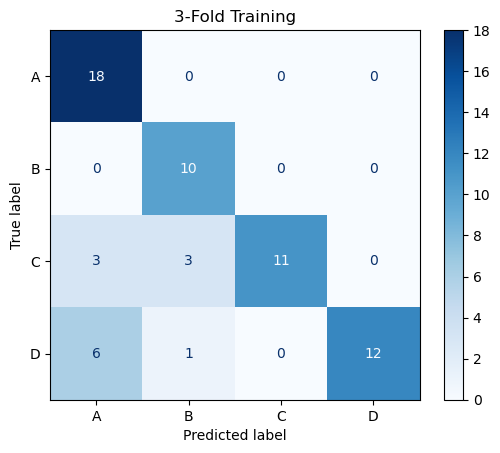

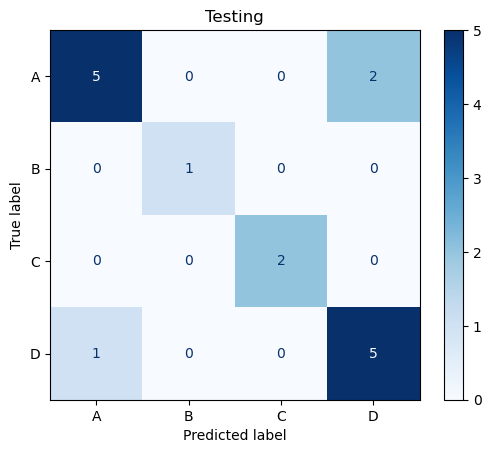

In [6]:
#Next we lock in these two features as our primaries, and run the code again
data.features = data[[columns[best_f1],columns[best_f2]]]

#Did I forget this line earlier?
#data.features = preprocessing.MinMaxScaler().fit_transform(data.features)
x_train, x_test, y_train, y_test = train_test_split(data.features,data.target, test_size=0.2,random_state=42)
#Find optimal K value?
k_scores = []
#The K should maybe go to 73?
for k in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,data.features,data.target,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
optimal_k = np.argmax(k_scores)


from sklearn.model_selection import cross_val_predict

#Run the classifier with optimal K
classifier = KNeighborsClassifier(optimal_k)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

# Return the predictions for the 3-Fold crossvalidation
y_predicted = cross_val_predict(classifier, x_train,y_train, cv=3)


#Display the accuracy found
#accuracy = str(accuracy_score(y_test, predictions)*100)+"%"
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)


# Construct the confusion matricies
conf_mat_train = confusion_matrix(y_train, y_predicted)
conf_mat_test = confusion_matrix(y_test, predictions)

target_names = ['A', 'B', 'C', 'D']

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay 
# Plot the confusion matrices
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(classifier, x_train, y_train,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,ax=ax)
ax.set_title('3-Fold Training')

fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test,
                                 display_labels=target_names,
                                 cmap=plt.cm.Blues,ax=ax)
ax.set_title('Testing')



In [12]:
print(y_predicted)

['HD' 'HD' 'LEH' 'DG' 'TJH' 'HD' 'DG' 'TJH' 'DG' 'DG' 'TJH' 'LEH' 'DG'
 'DG' 'LEH' 'HD' 'TJH' 'DG' 'LEH' 'TJH' 'LEH' 'HD' 'TJH' 'DG' 'HD' 'TJH'
 'TJH' 'DG' 'TJH' 'DG' 'TJH' 'LEH' 'HD' 'LEH' 'TJH' 'HD' 'TJH' 'DG' 'LEH'
 'DG' 'DG' 'DG' 'DG' 'HD' 'HD' 'DG' 'DG' 'HD' 'LEH' 'HD' 'HD' 'LEH' 'DG'
 'TJH' 'HD' 'DG' 'DG' 'DG' 'LEH' 'DG' 'LEH' 'HD' 'DG' 'HD']


In [7]:
X = data.features
x_min = (X[columns[best_f1]].min()) -1
x_max = (X[columns[best_f1]].max()) +1
y_min = (X[columns[best_f2]].min()) -1
y_max = (X[columns[best_f2]].max()) +1

x_min = (data.H_pct.min()) -1
x_max = (data.H_pct.max()) +1
y_min = (data.N_pct.min()) -1
y_max = (data.N_pct.max()) +1


xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#print(data.H_pct)

h = .02  # step size in the mesh


from matplotlib.colors import ListedColormap

import numpy as np

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue','red'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue','darkred'])
colors = ['darkorange', 'c', 'darkblue','darkred']



NameError: name 'h' is not defined

In [ ]:

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

print(xx)
print(yy)
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
#fig, ax = plt.subplots(figsize=(10,10))
#ax.pcolormesh(xx, yy, Z)

# Plot the training points
#ax.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', s=20)

# Plot the training points
#ax.scatter(x_test[:, 0], x_test[:, 1], c=y_test,
#            edgecolor='r', s=40)
#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())
#ax.set_title("KNN 3-Class classification")
#ax.legend()